In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
path = "/gdrive/MyDrive/deeplearning (1)/deeplearning/online_shoppers_intention.csv"
file_name = "/online_shoppers_intention.csv"

In [ ]:
# prompt: read the file as above mentioned


data = pd.read_csv(path)


In [ ]:
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


(<Figure size 800x800 with 1 Axes>, <Axes: >)

<Axes: ylabel='Weekend'>

Text(0.5, 58.5815972222222, 'VisitorType')

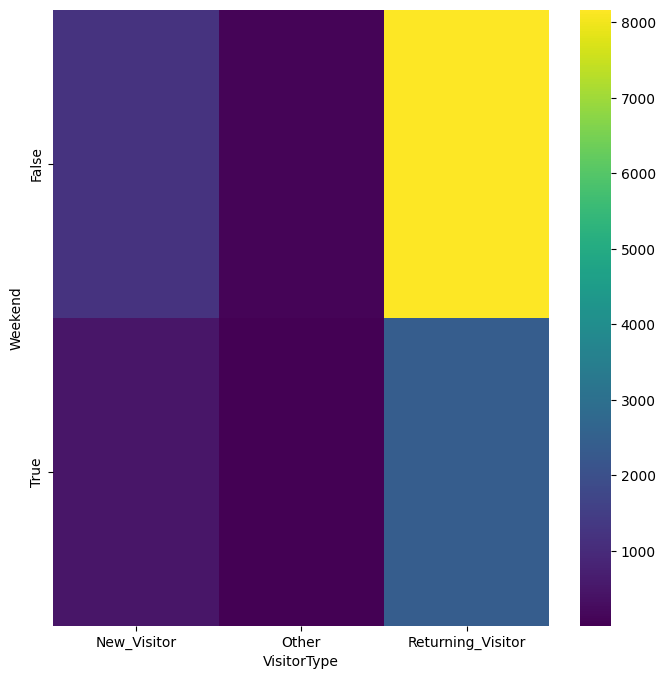

In [ ]:
# @title VisitorType vs Weekend

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weekend'].value_counts()
    for x_label, grp in data.groupby('VisitorType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VisitorType')
_ = plt.ylabel('Weekend')

<Axes: ylabel='Revenue'>

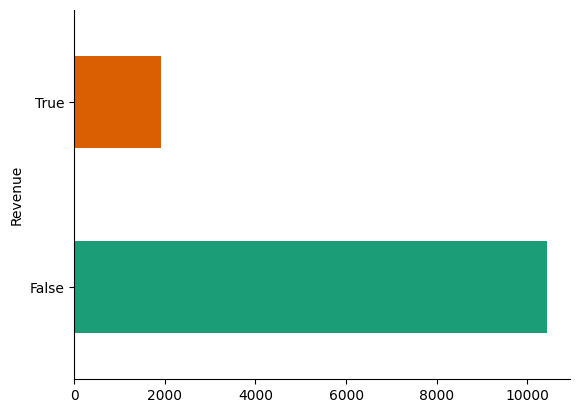

In [ ]:
# @title Revenue

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Revenue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='VisitorType'>

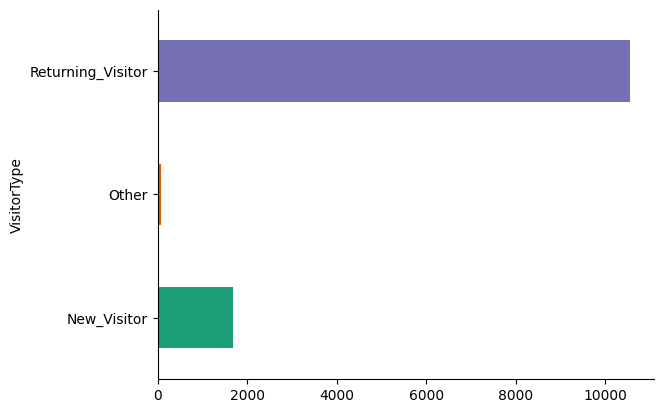

In [ ]:
# @title VisitorType

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('VisitorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

<Axes: ylabel='Revenue'>

Text(0.5, 58.7222222222222, 'Weekend')

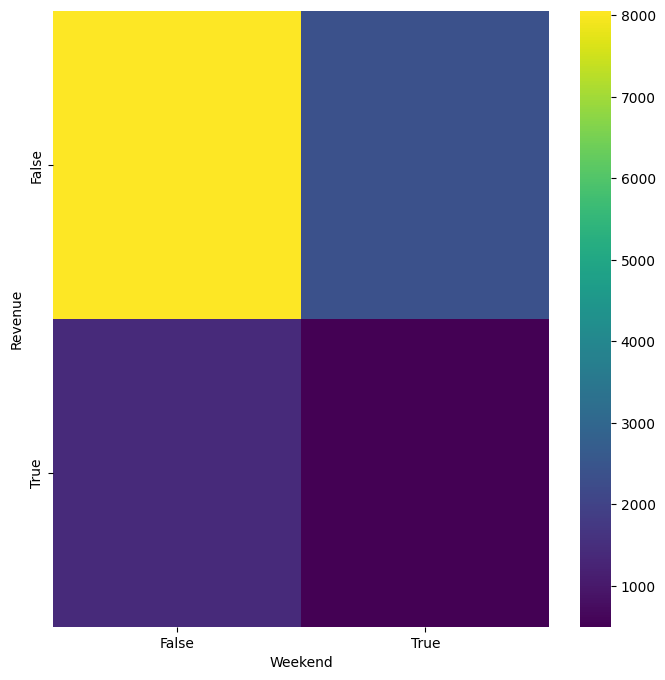

In [ ]:
# @title Weekend vs Revenue

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in data.groupby('Weekend')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weekend')
_ = plt.ylabel('Revenue')

In [ ]:
le_month = LabelEncoder()
le_visitortype = LabelEncoder()

In [ ]:
data['Month'] = le_month.fit_transform(data['Month'])
data['VisitorType'] = le_visitortype.fit_transform(data['VisitorType'])

In [ ]:
y = data.pop('Revenue')

In [ ]:
data.shape

(12330, 17)

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(data,
                                                  y,
                                                  test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

(9247, 17)

(3083, 17)

In [ ]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add( tf.keras.layers.Input(shape = (17,) ))

In [ ]:
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.4 ))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.4 ))

In [ ]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,
                    epochs = 80,
                    batch_size = 32,
                    validation_data = (X_test, y_test)
                   )

Epoch 1/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8071 - loss: 0.5147 - val_accuracy: 0.8479 - val_loss: 0.3866
Epoch 2/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8422 - loss: 0.4085 - val_accuracy: 0.8479 - val_loss: 0.3612
Epoch 3/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8464 - loss: 0.3748 - val_accuracy: 0.8482 - val_loss: 0.3424
Epoch 4/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8487 - loss: 0.3720 - val_accuracy: 0.8608 - val_loss: 0.3246
Epoch 5/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8613 - loss: 0.3415 - val_accuracy: 0.8758 - val_loss: 0.3044
Epoch 6/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3358 - val_accuracy: 0.8771 - val_loss: 0.2994
Epoch 7/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3161 - val_accuracy: 0.8900 - val_loss: 0.2831
Epoch 8/80
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 0.3114 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8906 - loss: 0.2458
Test Accuracy: 0.9001


                 Chi-square test   results
0  Pearson Chi-square ( 18.0) =   484.8196
1                     p-value =     0.0000
2                  Cramer's V =     0.1402


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 18.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


<Axes: xlabel='None-VisitorType', ylabel='Month'>

Text(0.5, 1.0, 'Chi-Square Test Results')

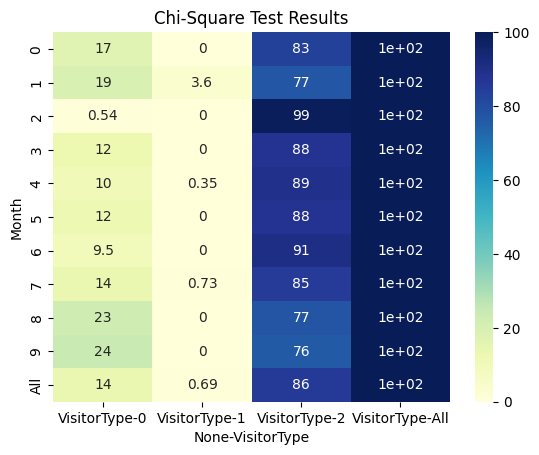

In [ ]:
# prompt: chi square test and also make a graph for it

import matplotlib.pyplot as plt
!pip install researchpy
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(data['Month'], data['VisitorType'],
                                               test="chi-square",
                                               expected_freqs=True,
                                               prop="row")
print(test_results)

import seaborn as sns
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")
plt.title('Chi-Square Test Results')
plt.show()


<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

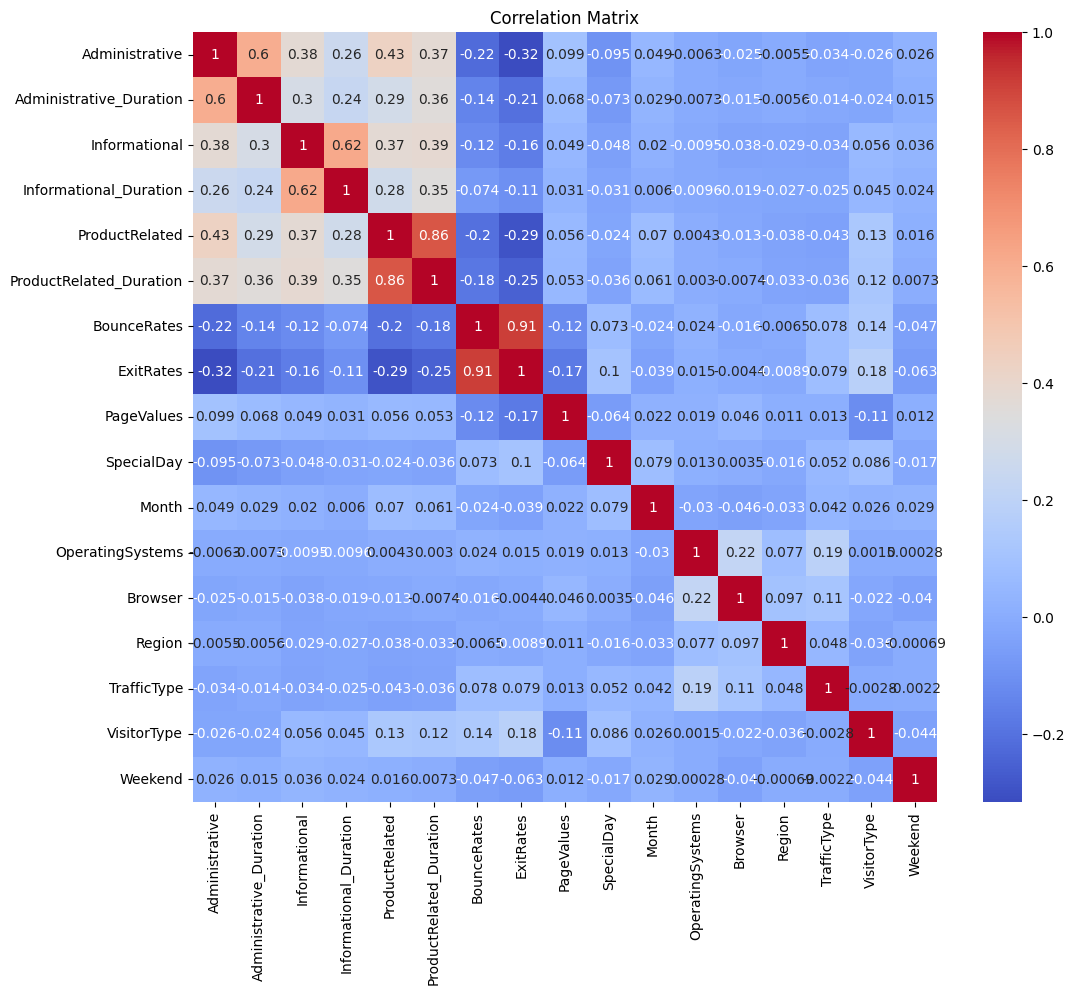

In [ ]:
# prompt: give me code for correlation test and make a chart for it

import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


T-test results for BounceRates between two VisitorTypes:
 TtestResult(statistic=-9.714942309652175, pvalue=8.964597880845453e-22, df=1777.0)

ANOVA results for PageValues across different months:
 F_onewayResult(statistic=nan, pvalue=nan)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='BounceRates', ylabel='Count'>

<Axes: xlabel='BounceRates', ylabel='Count'>

Text(0.5, 0, 'BounceRates')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BounceRates Distribution for Different VisitorTypes')

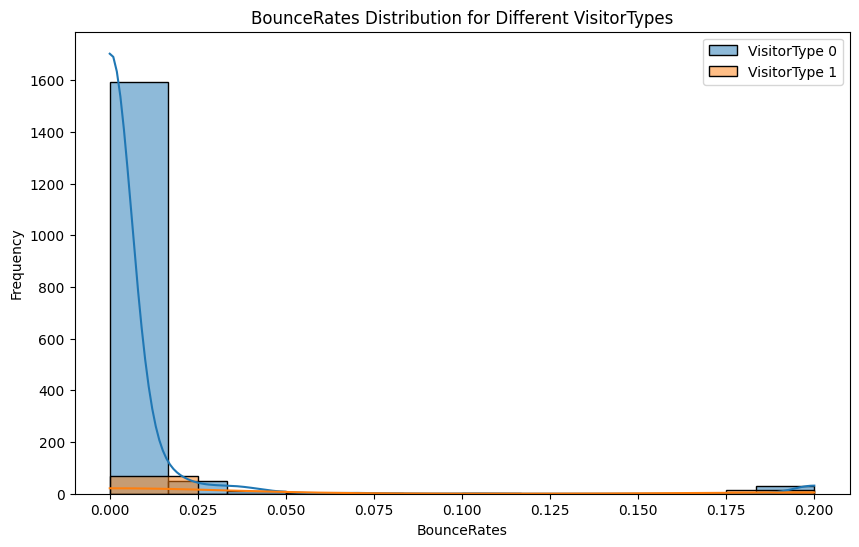

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Month', ylabel='PageValues'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'PageValues')

Text(0.5, 1.0, 'PageValues Distribution for Different Months')

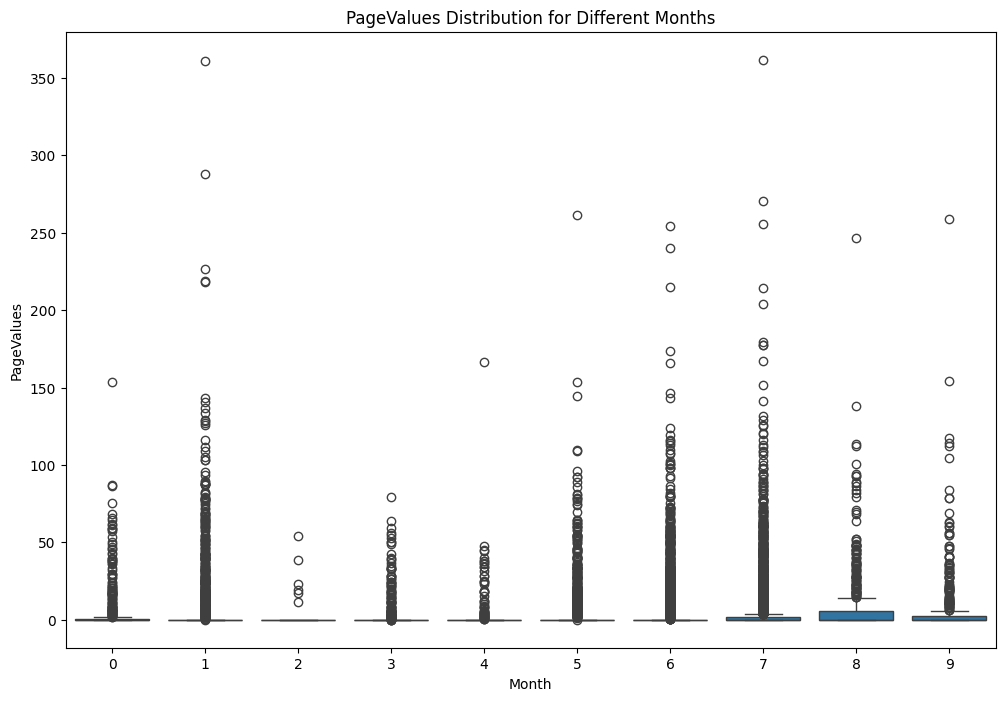

<Axes: xlabel='Month'>

Text(0.5, 0, 'Weekend')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Revenue by Weekend')

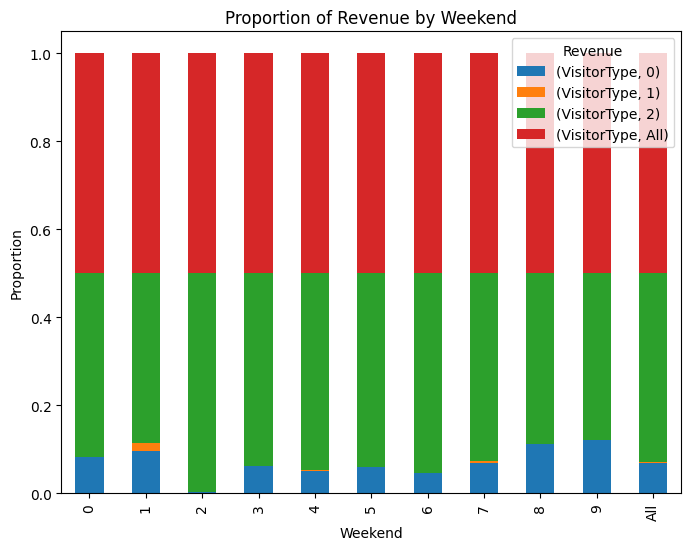

In [ ]:
# prompt: run different statistical tests and generate charts for each one of them

import matplotlib.pyplot as plt
from scipy import stats # Import the stats module from scipy
!pip install researchpy
import researchpy as rp

# T-test for comparing means of 'BounceRates' between two VisitorTypes
visitor_type_0 = data[data['VisitorType'] == 0]['BounceRates']
visitor_type_1 = data[data['VisitorType'] == 1]['BounceRates']
result_ttest = stats.ttest_ind(visitor_type_0, visitor_type_1)
print("T-test results for BounceRates between two VisitorTypes:\n", result_ttest)

# ANOVA for comparing means of 'PageValues' across different months
groups = [data['PageValues'][data['Month'] == i] for i in range(12)]
result_anova = stats.f_oneway(*groups)
print("\nANOVA results for PageValues across different months:\n", result_anova)


# Plot histograms for 'BounceRates' for each VisitorType
plt.figure(figsize=(10, 6))
sns.histplot(visitor_type_0, label='VisitorType 0', kde=True)
sns.histplot(visitor_type_1, label='VisitorType 1', kde=True)
plt.xlabel('BounceRates')
plt.ylabel('Frequency')
plt.title('BounceRates Distribution for Different VisitorTypes')
plt.legend()
plt.show()

# Plot boxplots for 'PageValues' for each month
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='PageValues', data=data)
plt.xlabel('Month')
plt.ylabel('PageValues')
plt.title('PageValues Distribution for Different Months')
plt.show()

# Plot stacked bar chart for 'Weekend' and 'Revenue'
crosstab_percent = crosstab.apply(lambda x: x/x.sum(), axis=1)
crosstab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Weekend')
plt.ylabel('Proportion')
plt.title('Proportion of Revenue by Weekend')
plt.legend(title='Revenue', loc='upper right')
plt.show()


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
# prompt: mount gdrive

from google.colab import drive
drive.mount('/gdrive')


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import os

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/deeplearning (1)/deeplearning/online_shoppers_intention.csv')

In [ ]:
%%writefile online_shoppers_intention.py

Overwriting online_shoppers_intention.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.196.166.127


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! wget -q -O - ipv4.icanhazip.com

35.196.166.127


In [ ]:
! streamlit run online_shoppers_intention.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.166.127:8501

your url is: https://quiet-beans-switch.loca.lt
2024-08-22 17:02:31.381 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 85, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 576, in code_to_exec
    exec(code, module.__dict__)
  File "/content/online_shoppers_intention.py", line 117, in <module>
    user_df = pd.df([user_input])
AttributeError: module 'pandas' has no attribute 'df'
2024-08-22 17:02:53.963 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 85, in exec_func_with_error_handling
    r

In [ ]:
# prompt: give me code to Illustrate with a heat map Identify regional preferences for different products on streamlit but there is no column date and traffic

import numpy as np
# Add this code to the online_shoppers_intention.py file

# Sample data (replace with your actual data)
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C']
sales_data = np.random.rand(len(regions), len(products))

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
                   z=sales_data,
                   x=products,
                   y=regions,
                   hoverongaps = False))
fig.update_layout(title='Regional Preferences for Products',
                  xaxis_title='Products',
                  yaxis_title='Regions')

# Display the heatmap in Streamlit
st.plotly_chart(fig)


In [ ]:
# prompt: make a prediction model with my dataset, data and y are not defined and please tell me what should be my target variable series

# Assuming 'Revenue' is the target variable you want to predict
y = data['Revenue']

# Features (select relevant columns for prediction)
features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
            'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
            'Weekend']
X = data[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (example: Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Further evaluation metrics can be used (precision, recall, F1-score, etc.)


In [ ]:
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(df.drop('Revenue', axis=1), y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression  # Import the class

model = LogisticRegression()

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8767434317223484


In [ ]:
# prompt: give me code to generate a predictive model for my dataset on streamlit with only 4 most relevant variables

%%writefile online_shoppers_intention.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data (replace with your actual data loading)
df = pd.read_csv('/content/drive/MyDrive/deeplearning (1)/deeplearning/online_shoppers_intention.csv')

# Select the 4 most relevant features (replace with your actual feature selection)
relevant_features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'BounceRates']

# Prepare the data
X = df[relevant_features]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Streamlit app
st.title("Online Shopper Purchase Prediction")

# User input for prediction
st.sidebar.header("Input Features")
page_values = st.sidebar.number_input("PageValues", min_value=0.0)
exit_rates = st.sidebar.number_input("ExitRates", min_value=0.0)
product_related_duration = st.sidebar.number_input("ProductRelated_Duration", min_value=0.0)
bounce_rates = st.sidebar.number_input("BounceRates", min_value=0.0)

# Make prediction
input_data = pd.DataFrame({
    'PageValues': [page_values],
    'ExitRates': [exit_rates],
    'ProductRelated_Duration': [product_related_duration],
    'BounceRates': [bounce_rates]
})
prediction = model.predict(input_data)[0]

# Display prediction
if prediction == 1:
    st.write("Prediction: **Purchase**")
else:
    st.write("Prediction: **No Purchase**")
